In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

# Algorithmus

In [2]:
def shakerSort(arr):
    swap = range(len(arr)-1)
    while 1:
        for index in (swap,reversed(swap)):
            swapped = False
            for i in index:
                if arr[i] > arr[i+1]:
                    arr[i], arr[i+1] = arr[i+1], arr[i]
                    swapped = True
            if not swapped:
                return arr
            
# Speicherkomplexität: O(n) 

# Laufzeitkomplexität O(n²)

In [3]:
random_number_sequence = np.arange(1,10000000)

In [4]:
test_array = []
for i in range(1,15):
    test_array.append(np.random.choice(random_number_sequence, size=1500*i, replace=False))
test_array

[array([4450926,  666489, 5624532, ...,  915298, 6399760, 1521718]),
 array([7966626, 9574047, 8366360, ...,   16235, 2813694, 3479296]),
 array([6479186, 7071341, 7542956, ..., 6681088, 7670237, 7301537]),
 array([3179894, 6201908, 7176892, ..., 2178755, 1435366, 2203456]),
 array([2030762, 4571539, 2490090, ..., 6471740, 6941752, 2538912]),
 array([9769658, 7290319, 8767466, ..., 8921181, 4378053, 2427054]),
 array([6476184, 7255704, 5015439, ..., 4204989, 3416211, 4453867]),
 array([7029740, 5597730, 8246863, ..., 9269116,   40217, 6444664]),
 array([6897140, 2534426, 2955575, ..., 3731331, 2885560, 6715120]),
 array([1702892, 1115141,  834087, ..., 8884244,  785010, 1940829]),
 array([9035744, 5501928, 4029391, ..., 3310480, 4298814,  624738]),
 array([9277452, 9235264, 4025152, ..., 8026869, 1482702, 3109035]),
 array([4047663, 8650100, 8853652, ..., 4311535, 1101905, 8677859]),
 array([5854111, 3208795, 1665681, ..., 4398572, 5834509, 8411175])]

In [5]:
def laufzeiten(arr):
    laufzeiten = {}
    for i in range(14):
        laufzeit_arr = []
        start = timeit.default_timer()
        shakerSort(test_array[i])
        laufzeit_arr.append(timeit.default_timer() - start)        #Differenz Start-/Stopzeit als Element im Array
        laufzeiten[i] = laufzeit_arr                                   #Array ins Dict einfügen  

    
    #Berechne Mittelwert der Laufzeiten   
    mean = []
    for value in laufzeiten.values():
        mean.append(np.mean(value))
    return (mean)

In [16]:
x = laufzeiten(test_array)
x

[0.00065113000164274126,
 0.0012003619995084591,
 0.0017963179998332635,
 0.0054668260054313578,
 15.964041726001597,
 34.208830466996005,
 47.93599814800109,
 62.170872569004132,
 77.059121206999407,
 92.270028195001942,
 111.71400923500187,
 130.2647078969967,
 153.23558610799955,
 174.79504887200164]

In [8]:
y_1 = np.array([0.00065113000164274126,
 0.0012003619995084591,
 0.0017963179998332635,
 0.0054668260054313578,
 15.964041726001597,
 34.208830466996005,
 47.93599814800109,
 62.170872569004132,
 77.059121206999407,
 92.270028195001942,
 111.71400923500187,
 130.2647078969967,
 153.23558610799955,
 174.79504887200164])

n = []
for i in range(1,len(y_1)+1):
    n.append(1500*i)
    
x_1 = np.array(n)
x_1

array([ 1500,  3000,  4500,  6000,  7500,  9000, 10500, 12000, 13500,
       15000, 16500, 18000, 19500, 21000])

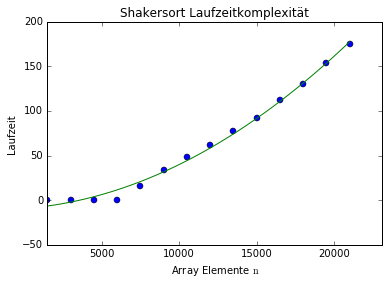

In [10]:
#import sys            for Python 2.7

#reload(sys)  
#sys.setdefaultencoding('utf8')

# get x and y vectors
x = x_1
y = y_1

# calculate polynomial
z = np.polyfit(x, y, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.title(r'Shakersort Laufzeitkomplexität')
plt.xlabel(r'Array Elemente $\mathrm{n}$')
plt.ylabel('Laufzeit')
plt.xlim([x[0]-1, x[-1]*1.1])
plt.savefig('Shakersort Laufzeitkomplexität')
plt.show()